In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv

In [1]:
# read data
def read_data(file_name):
    data_mat = np.genfromtxt(file_name, delimiter=',',dtype=int)
    
    x_data = np.concatenate( ( np.ones((data_mat.shape[0],1)) , np.transpose(np.array([data_mat[0:,0]])) ), axis = 1 )
    y_data = np.transpose(np.array([data_mat[0:,1]]))
    return [x_data, y_data]
    pass

# start grad descent
def grad_descent(alpha, b_init, xy_data, N, batch):
    iter=0; cost_array = np.zeros((1,N)); iter_mini=0 
    N_ele = xy_data[0].shape[0]
    batch_nos = int(N_ele/batch)
    cost_array_mini = np.zeros((1,batch_nos*N))
    
    # make batches
    batch_ind_whole = np.random.permutation(N_ele)
    batch_ind = np.zeros((batch_nos, batch))
    for i in range(batch_nos):
        batch_ind[i,:] = batch_ind_whole[i*batch:(i+1)*batch]
    batch_ind.astype(int)
    
    x_samples = np.zeros((2, batch))
    y_samples = np.zeros((1, batch))
    
    while iter < N:          
        for i in range(batch_nos):   
            x_samples[0:2,:]= xy_data[0][batch_ind[i,:].astype(int), 0:].T
            y_samples[0,:]= xy_data[1][batch_ind[i,:].astype(int),0].T
            [grad_tot, cost_mini] = cost_grad(b_init, x_samples, y_samples)
            b_init = b_init - alpha*grad_tot
            cost_array_mini[0, iter_mini] = cost_mini
            iter_mini=iter_mini+1
            
        cost_array[0,iter]=cost_grad(b_init, x_samples, y_samples)[1]
        iter=iter+1
        
    b_final = b_init
    return [b_final, cost_array, cost_array_mini]
       
def cost_grad(b_init, x_samples, y_samples):
    grad= np.zeros((2,1))
    grad[:,0] =   ( np.transpose(b_init) @ x_samples - y_samples ) @ np.transpose(x_samples[:,:])
    cost = 0.5*np.sum(np.square( b_init[0,0]*x_samples[0,:] + b_init[1,0]*x_samples[1,:] - y_samples[0,:] ))
    
    return [grad/x_samples.shape[1], cost/x_samples.shape[1]]

[[-0.43320409]
 [ 1.00253665]]


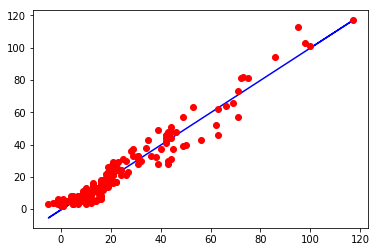

In [3]:
# Problem a
alpha = 0.0001; batch = 180; b_init = np.array([[1], [1]])
N = 50000
xy_data = read_data("data.csv")

[b_fin, cost_array] = grad_descent(alpha, b_init, xy_data, N, batch)[0:2]
print(b_fin)
plt.plot(xy_data[0][:,1], b_fin[0,0]+b_fin[1,0]*xy_data[0][:,1], '-b', xy_data[0][:,1], xy_data[1][:,0], 'ro' )

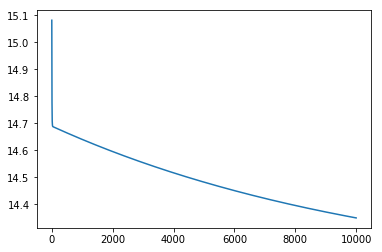

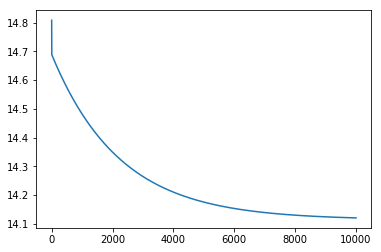

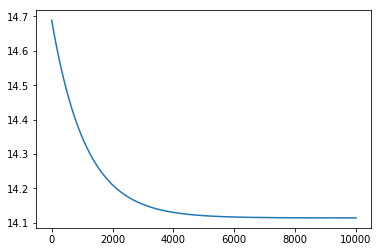

In [4]:
# Problem b
xy_data = read_data("data.csv")

# Learning rate = 0.0001
alpha = 0.0001; batch = 180; b_init = np.array([[1], [1]])
N = 10000
[b_fin, cost_array_1] = grad_descent(alpha, b_init, xy_data, N, batch)[0:2]
plt.figure(2)
plt.plot(range(N),cost_array_1[0,:])


# Learning rate = 0.0005
alpha = 0.0005; batch = 180; b_init = np.array([[1], [1]])
N = 10000
[b_fin, cost_array_2] = grad_descent(alpha, b_init, xy_data, N, batch)[0:2]
plt.figure(3)
plt.plot(range(N),cost_array_2[0,:])


# Learning rate = 0.001
alpha = 0.001; batch = 180; b_init = np.array([[1], [1]])
N = 10000
[b_fin, cost_array_3] = grad_descent(alpha, b_init, xy_data, N, batch)[0:2]
plt.figure(4)
plt.plot(range(N),cost_array_3[0,:])

#Problem c
After testing all 3 rates, it is apparent that the best alpha is 0.001. This is because it is the learning rate that helps the solution converge to the final solution in the least number of iterations. Also, it is not so large that it diverges away from the local minimum. In general, we want the highest learning rate that converges properly.

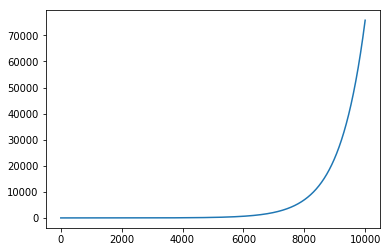

In [5]:
# Problem d
# Learning rate = 0.001
alpha = 0.00198; batch = 180; b_init = np.array([[1], [1]])
N = 10000
[b_fin, cost_array_4] = grad_descent(alpha, b_init, xy_data, N, batch)[0:2]
plt.figure(5)
plt.plot(range(N),cost_array_4[0,:])

# The alpha value at which divergence is observed comes out to be 0.00198

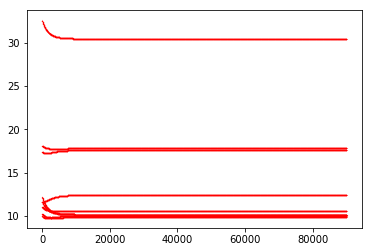

In [12]:
# Problem e
# batch = 20

alpha = 0.001; batch = 20; b_init = np.array([[1], [1]])
N = 10000
[b_fin, cost_array_5, cost_array_mini] = grad_descent(alpha, b_init, xy_data, N, batch)
plt.figure(6)
plt.plot(range(N*int(180/batch)), cost_array_mini[0,:] ,'ro', markersize=0.1)

We can observe from the plot 9 different trends. These are the trends of the 9 batches that were selected randomly from the data sample.

Everytime we iterate through one epoch, we will get 9 disjoint values, since we are calculating the cost of 9 mini-batches.
In the next epoch, the cost values of each mini-batch will be in the neighbourhood of the same mini-batch in the prev epoch.

Hence, we see 9 different trends, some increasing some decreasing. However, the overall cost decreases.